In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn import metrics
import pickle
%matplotlib inline

In [2]:
df=pd.read_csv('car data.csv')

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
Cat_Features=df.select_dtypes(include='object')

In [7]:
#Printing All Unique Values For Categorical Features
for i in Cat_Features.columns:
    if i=='Car_Name':
        pass
    else:
        print(i)
        print(df[i].unique())
        print('-'*25)

Fuel_Type
['Petrol' 'Diesel' 'CNG']
-------------------------
Seller_Type
['Dealer' 'Individual']
-------------------------
Transmission
['Manual' 'Automatic']
-------------------------


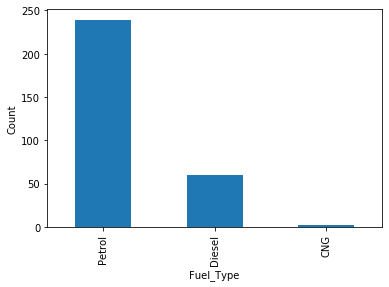

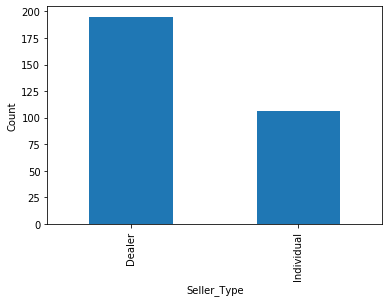

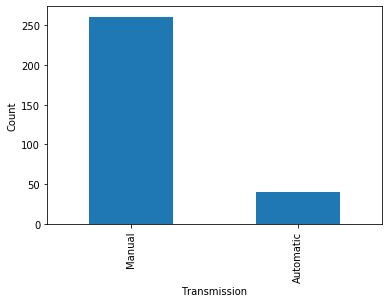

In [8]:
#Display Bar Graphs For All Categorical Features
for i in Cat_Features.columns:
    if i=='Car_Name':
        pass
    else:
        df[i].value_counts().plot(kind='bar')
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.show()

In [9]:
Num_Features=df.select_dtypes(exclude='object')

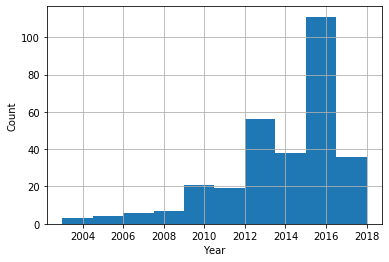

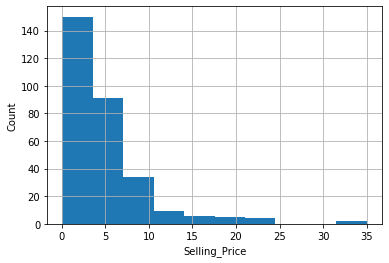

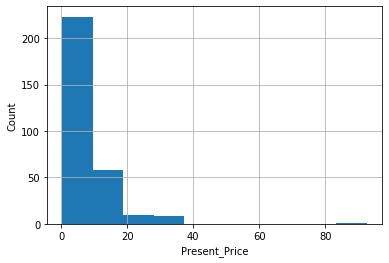

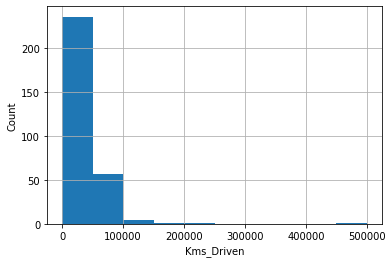

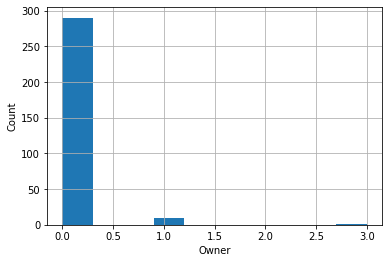

In [10]:
#Display Histograms For All Numerical Features
for i in Num_Features.columns:
        df[i].hist()
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.show()

In [11]:
df['No_Of_Years']=2020-df['Year']

In [12]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Of_Years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [13]:
df.drop(['Car_Name','Year'],axis=1,inplace=True)

In [14]:
df=pd.get_dummies(df,drop_first=True)

In [15]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,1,0,0,1
297,4.00,5.90,60000,0,5,0,1,0,1
298,3.35,11.00,87934,0,11,0,1,0,1
299,11.50,12.50,9000,0,3,1,0,0,1


In [16]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_Of_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [17]:
# Independent and Dependent Features
X=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']

In [18]:
#Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[0.41486729 0.038259   0.00078564 0.08023182 0.20653561 0.01591831
 0.12130778 0.12209455]


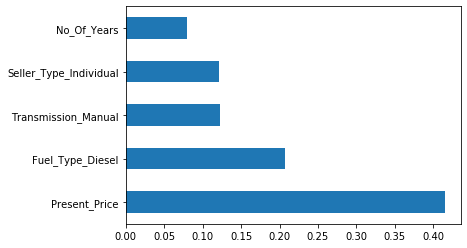

In [19]:
#Plot graph for featuresimportances for better visualization
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
dtree=DecisionTreeRegressor(criterion="mse")
dtree.fit(X_train,y_train)
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 1.0
Coefficient of determination R^2 <-- on test set: 0.9141273540510457


In [22]:
score=cross_val_score(dtree,X,y,cv=5)
score.mean()

0.2322991066220274

## Tree Visualization

In [23]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [25]:
features = list(X.columns)
features

['Present_Price',
 'Kms_Driven',
 'Owner',
 'No_Of_Years',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Seller_Type_Individual',
 'Transmission_Manual']

In [26]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

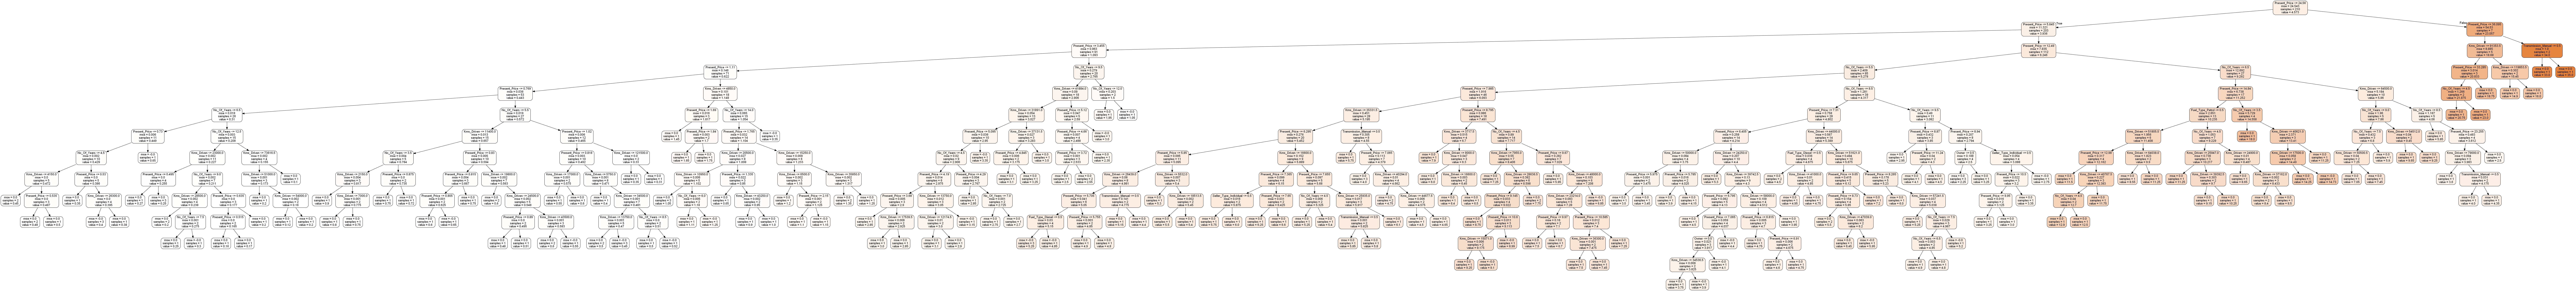

In [27]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Model Evaluation

In [28]:
prediction=dtree.predict(X_test)

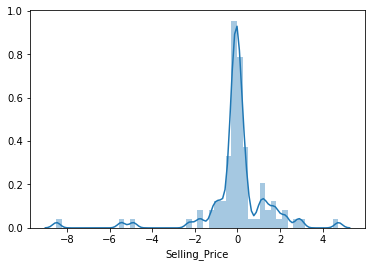

In [29]:
sns.distplot(y_test-prediction)

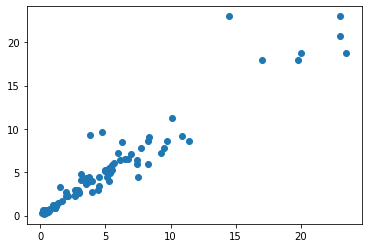

In [30]:
plt.scatter(y_test,prediction)

In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.8205494505494507
MSE: 2.445154945054945
RMSE: 1.563699122291416


### Hyperparameter Tuning Decision Tree Regressor

In [32]:
## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]    
}

In [33]:

grid_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [34]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [35]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
grid_search.fit(X,y)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 1745 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 5265 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 10193 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 16529 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 24273 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 32962 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 36972 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 46652 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 58812 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 72252 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 86972 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 102400 out of 102400 | elapsed:  5.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                

In [37]:
grid_search.best_params_

{'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 5,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [38]:
grid_search.best_score_

-10.807865456418057

In [39]:
predictions=grid_search.predict(X_test)

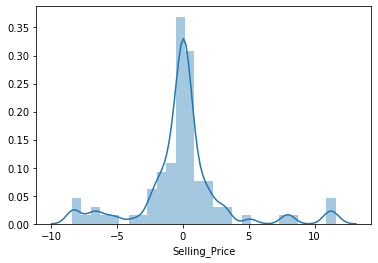

In [40]:
sns.distplot(y_test-predictions)

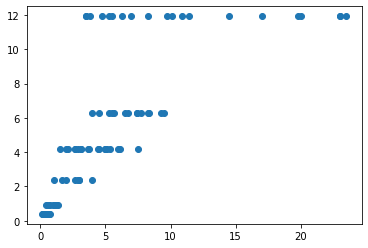

In [41]:
plt.scatter(y_test,predictions)

In [42]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.9871744640956348
MSE: 11.662914164085732
RMSE: 3.41510090101094


In [43]:
# open a file, where you ant to store the data
file = open('decision_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(grid_search, file)